In [16]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D

In [ ]:
test_image =image.load_img(r"E:\Dataset\wheat disease\data\test\septoria_test\septoria_14.png", target_size = (300, 300))

test_image = image.img_to_array(test_image)
plt.figure(figsize=(12, 12))
plt.imshow(test_image.astype(np.uint8))
plt.axis("off")
plt.show()

In [3]:
def train_dg(path):

    train = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    rescale=1./255,
    )

    train = train.flow_from_directory(
    directory=path,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical"
    )
    return train

In [4]:
def val_dg(path):

    test = ImageDataGenerator(
        rescale=1./255
    )

    test = test.flow_from_directory(
    directory=path,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical"
    )
    return test

In [5]:
train_datagen = train_dg(r"E:\archive\data\train")

Found 2942 images belonging to 3 classes.


In [6]:
test_datagen = val_dg(r"E:\archive\data\val")

Found 737 images belonging to 3 classes.


In [7]:
ig, la = next(train_datagen)

(-0.5, 223.5, 223.5, -0.5)

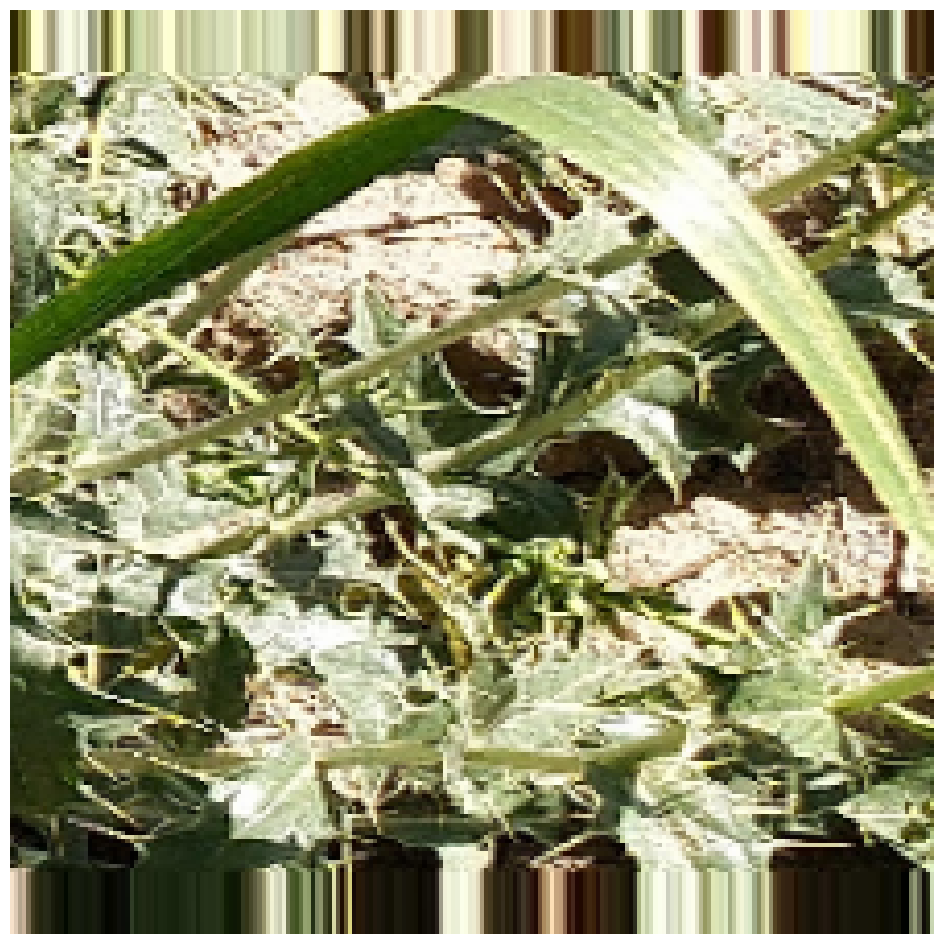

In [8]:
plt.figure(figsize=(12, 12))
plt.imshow(ig[0])
plt.axis("off")

In [ ]:
def model(x):
    x = Conv2D()